Q1

In [1]:
import numpy as np

def summation_unit(inputs, weights):
    """
    Computes the weighted sum of inputs.
    :param inputs: List or array of input values.
    :param weights: List or array of weight values.
    :return: Weighted sum of inputs.
    """
    return np.dot(inputs, weights)

def step_activation(value):
    """
    Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns 0.
    """
    return 1 if value >= 0 else 0

def bipolar_step_activation(value):
    """
    Bipolar Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns -1.
    """
    return 1 if value >= 0 else -1

def sigmoid_activation(value):
    """
    Sigmoid Activation Function.
    Maps any real value to a range between 0 and 1.
    """
    return 1 / (1 + np.exp(-value))

def tanh_activation(value):
    """
    TanH Activation Function.
    Maps any real value to a range between -1 and 1.
    """
    return np.tanh(value)

def relu_activation(value):
    """
    ReLU Activation Function.
    Returns 0 for negative values and the value itself for positive inputs.
    """
    return max(0, value)

def leaky_relu_activation(value, alpha=0.01):
    """
    Leaky ReLU Activation Function.
    Allows a small gradient for negative inputs instead of zero.
    :param alpha: Small slope for negative values (default is 0.01).
    """
    return value if value > 0 else alpha * value

def error_comparator(expected_output, actual_output):
    """
    Computes the error between expected and actual output.
    :param expected_output: Expected output value.
    :param actual_output: Computed output value.
    :return: Error value (difference between expected and actual output).
    """
    return expected_output - actual_output

# Main Program Execution
def main():
    # Sample input values
    inputs = [0.5, 0.3, 0.9]
    weights = [0.2, 0.8, -0.5]
    expected_output = 1.0

    # Compute the weighted sum using summation unit
    weighted_sum = summation_unit(inputs, weights)

    # Compute activation outputs using different activation functions
    step_output = step_activation(weighted_sum)
    bipolar_output = bipolar_step_activation(weighted_sum)
    sigmoid_output = sigmoid_activation(weighted_sum)
    tanh_output = tanh_activation(weighted_sum)
    relu_output = relu_activation(weighted_sum)
    leaky_relu_output = leaky_relu_activation(weighted_sum)

    # Compute errors for different activation outputs
    step_error = error_comparator(expected_output, step_output)
    sigmoid_error = error_comparator(expected_output, sigmoid_output)

    # Print results
    print("Weighted Sum:", weighted_sum)
    print("Step Activation Output:", step_output)
    print("Bipolar Step Activation Output:", bipolar_output)
    print("Sigmoid Activation Output:", sigmoid_output)
    print("TanH Activation Output:", tanh_output)
    print("ReLU Activation Output:", relu_output)
    print("Leaky ReLU Activation Output:", leaky_relu_output)
    print("Step Activation Error:", step_error)
    print("Sigmoid Activation Error:", sigmoid_error)

# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()


Weighted Sum: -0.11000000000000004
Step Activation Output: 0
Bipolar Step Activation Output: -1
Sigmoid Activation Output: 0.47252769565540637
TanH Activation Output: -0.10955847021442958
ReLU Activation Output: 0
Leaky ReLU Activation Output: -0.0011000000000000005
Step Activation Error: 1.0
Sigmoid Activation Error: 0.5274723043445937


Q2

Final Weights: [-0.1   0.1   0.05]
Epochs until Convergence: 130


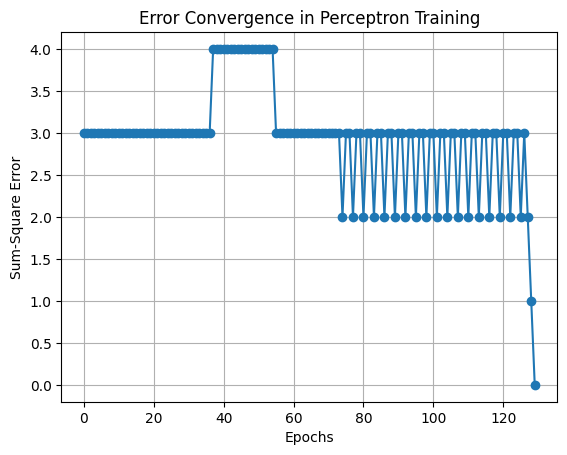

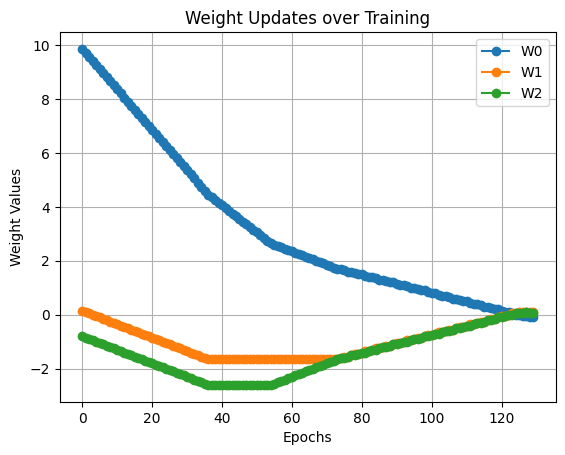

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """
    Computes the weighted sum of inputs.
    :param inputs: List or array of input values.
    :param weights: List or array of weight values.
    :return: Weighted sum of inputs.
    """
    return np.dot(inputs, weights)

def step_activation(value):
    """
    Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns 0.
    """
    return 1 if value >= 0 else 0

def error_comparator(expected_output, actual_output):
    """
    Computes the error between expected and actual output.
    :param expected_output: Expected output value.
    :param actual_output: Computed output value.
    :return: Error value (difference between expected and actual output).
    """
    return expected_output - actual_output

def perceptron_and_gate(training_data, initial_weights, learning_rate, max_epochs=1000, convergence_threshold=0.002):
    """
    Implements a Perceptron to learn AND gate logic using Step Activation Function.
    :param training_data: List of tuples (input_values, expected_output)
    :param initial_weights: Initial weights including bias.
    :param learning_rate: Learning rate for weight updates.
    :param max_epochs: Maximum number of epochs for training.
    :param convergence_threshold: Error threshold for convergence.
    """
    weights = np.array(initial_weights)
    errors = []
    weight_history = []

    for epoch in range(max_epochs):
        total_error = 0
        for inputs, expected in training_data:
            inputs_with_bias = np.insert(inputs, 0, 1)  # Adding bias term
            weighted_sum = summation_unit(inputs_with_bias, weights)
            output = step_activation(weighted_sum)
            error = error_comparator(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * inputs_with_bias  # Weight update rule

        errors.append(total_error)
        weight_history.append(weights.copy())
        if total_error <= convergence_threshold:
            break  # Stop if error is sufficiently low

    return weights, errors, weight_history, epoch + 1

def plot_error(errors):
    """
    Plots the sum-square-error over epochs.
    :param errors: List of sum-square-errors per epoch.
    """
    plt.figure()
    plt.plot(range(len(errors)), errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.title('Error Convergence in Perceptron Training')
    plt.grid()
    plt.show()

def plot_weight_changes(weight_history):
    """
    Plots the changes in weight values over epochs.
    :param weight_history: List of weight values over training epochs.
    """
    weight_history = np.array(weight_history)
    plt.figure()
    for i in range(weight_history.shape[1]):
        plt.plot(range(len(weight_history)), weight_history[:, i], marker='o', label=f'W{i}')
    plt.xlabel('Epochs')
    plt.ylabel('Weight Values')
    plt.title('Weight Updates over Training')
    plt.legend()
    plt.grid()
    plt.show()

# Main Program Execution
def main():
    # AND Gate Training Data (Input pairs and expected output)
    training_data = [
        (np.array([0, 0]), 0),
        (np.array([0, 1]), 0),
        (np.array([1, 0]), 0),
        (np.array([1, 1]), 1)
    ]

    # Given initial weights and learning rate
    initial_weights = [10, 0.2, -0.75]  # Including bias weight W0
    learning_rate = 0.05

    # Train the perceptron
    final_weights, errors, weight_history, epochs = perceptron_and_gate(training_data, initial_weights, learning_rate)

    # Print final results
    print("Final Weights:", final_weights)
    print("Epochs until Convergence:", epochs)

    # Plot the error convergence
    plot_error(errors)

    # Plot weight updates
    plot_weight_changes(weight_history)

# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()



Q3


Activation Function: Bipolar Step
Final Weights: [-0.1   0.1   0.05]
Epochs until Convergence: 1000

Activation Function: Sigmoid
Final Weights: [-0.1   0.1   0.05]
Epochs until Convergence: 130

Activation Function: ReLU
Final Weights: [-0.92774472  0.95116001  0.94981086]
Epochs until Convergence: 390


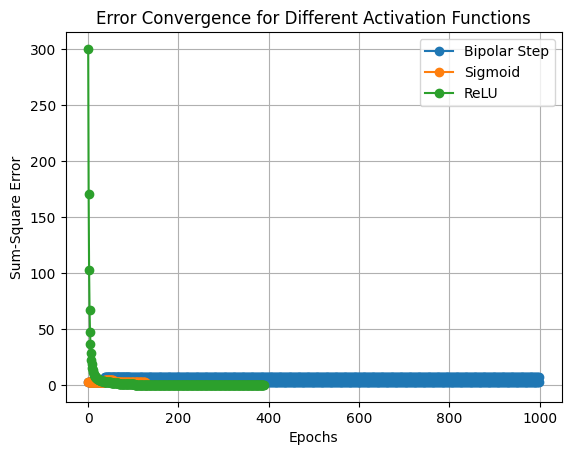

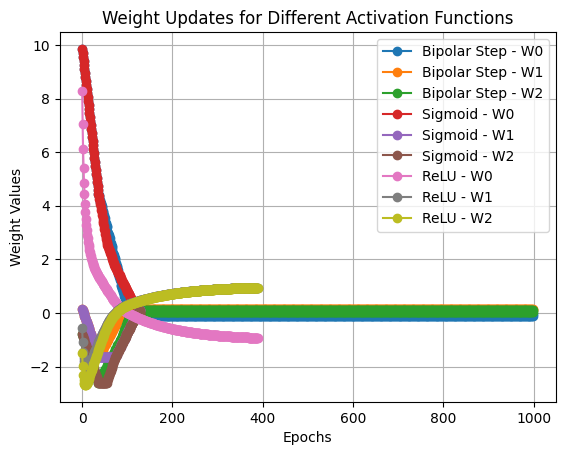

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """
    Computes the weighted sum of inputs.
    :param inputs: List or array of input values.
    :param weights: List or array of weight values.
    :return: Weighted sum of inputs.
    """
    return np.dot(inputs, weights)

def bipolar_step_activation(value):
    """
    Bipolar Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns -1.
    """
    return 1 if value >= 0 else -1

def sigmoid_activation(value):
    """
    Sigmoid Activation Function.
    Maps any real value to a range between 0 and 1.
    """
    return 1 / (1 + np.exp(-value))

def relu_activation(value):
    """
    ReLU Activation Function.
    Returns 0 for negative values and the value itself for positive inputs.
    """
    return max(0, value)

def error_comparator(expected_output, actual_output):
    """
    Computes the error between expected and actual output.
    :param expected_output: Expected output value.
    :param actual_output: Computed output value.
    :return: Error value (difference between expected and actual output).
    """
    return expected_output - actual_output

def perceptron_and_gate(training_data, initial_weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    """
    Implements a Perceptron to learn AND gate logic using different activation functions.
    :param training_data: List of tuples (input_values, expected_output)
    :param initial_weights: Initial weights including bias.
    :param learning_rate: Learning rate for weight updates.
    :param activation_function: Activation function to use.
    :param max_epochs: Maximum number of epochs for training.
    :param convergence_threshold: Error threshold for convergence.
    """
    weights = np.array(initial_weights)  # Initialize weight array
    errors = []  # To store sum-square errors per epoch
    weight_history = []  # To track weight updates over epochs

    for epoch in range(max_epochs):
        total_error = 0
        for inputs, expected in training_data:
            inputs_with_bias = np.insert(inputs, 0, 1)  # Adding bias term
            weighted_sum = summation_unit(inputs_with_bias, weights)
            output = activation_function(weighted_sum)

            # Convert sigmoid output to binary class (threshold at 0.5)
            if activation_function == sigmoid_activation:
                output = 1 if output >= 0.5 else 0

            error = error_comparator(expected, output)
            total_error += error ** 2  # Accumulate squared error

            # Update weights using Perceptron learning rule
            weights += learning_rate * error * inputs_with_bias

        errors.append(total_error)  # Store error for plotting
        weight_history.append(weights.copy())  # Store weight updates

        # Stop training if the error is below the convergence threshold
        if total_error <= convergence_threshold:
            break

    return weights, errors, weight_history, epoch + 1

def plot_all_errors(errors_dict):
    """
    Plots the sum-square-error over epochs for all activation functions.
    :param errors_dict: Dictionary containing error lists for each activation function.
    """
    plt.figure()
    for activation, errors in errors_dict.items():
        plt.plot(range(len(errors)), errors, marker='o', label=activation)
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.title('Error Convergence for Different Activation Functions')
    plt.legend()
    plt.grid()
    plt.show()

def plot_all_weights(weight_dict):
    """
    Plots weight changes over epochs for all activation functions.
    :param weight_dict: Dictionary containing weight history for each activation function.
    """
    plt.figure()
    for activation, weight_history in weight_dict.items():
        weight_history = np.array(weight_history)
        for i in range(weight_history.shape[1]):
            plt.plot(range(len(weight_history)), weight_history[:, i], marker='o', label=f'{activation} - W{i}')
    plt.xlabel('Epochs')
    plt.ylabel('Weight Values')
    plt.title('Weight Updates for Different Activation Functions')
    plt.legend()
    plt.grid()
    plt.show()

# Main Program Execution
def main():
    """
    Main function to train perceptron on AND gate data using different activation functions.
    """
    training_data = [
        (np.array([0, 0]), 0),
        (np.array([0, 1]), 0),
        (np.array([1, 0]), 0),
        (np.array([1, 1]), 1)
    ]

    # Given initial weights (including bias weight W0)
    initial_weights = [10, 0.2, -0.75]
    learning_rate = 0.05

    # Dictionary of activation functions to test
    activation_functions = {
        'Bipolar Step': bipolar_step_activation,
        'Sigmoid': sigmoid_activation,
        'ReLU': relu_activation
    }

    errors_dict = {}  # To store error values for each activation function
    weight_dict = {}  # To store weight updates for each activation function

    # Train perceptron using each activation function
    for name, activation_function in activation_functions.items():
        final_weights, errors, weight_history, epochs = perceptron_and_gate(training_data, initial_weights, learning_rate, activation_function)

        # Print final results
        print(f"\nActivation Function: {name}")
        print("Final Weights:", final_weights)
        print("Epochs until Convergence:", epochs)

        # Store results for plotting
        errors_dict[name] = errors
        weight_dict[name] = weight_history

    # Plot all errors and weight updates together
    plot_all_errors(errors_dict)
    plot_all_weights(weight_dict)

# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()


Q4

Learning Rate: 0.1, Epochs to Converge: 1000
Learning Rate: 0.2, Epochs to Converge: 1000
Learning Rate: 0.3, Epochs to Converge: 1000
Learning Rate: 0.4, Epochs to Converge: 1000
Learning Rate: 0.5, Epochs to Converge: 1000
Learning Rate: 0.6, Epochs to Converge: 1000
Learning Rate: 0.7, Epochs to Converge: 1000
Learning Rate: 0.8, Epochs to Converge: 1000
Learning Rate: 0.9, Epochs to Converge: 1000
Learning Rate: 1.0, Epochs to Converge: 1000


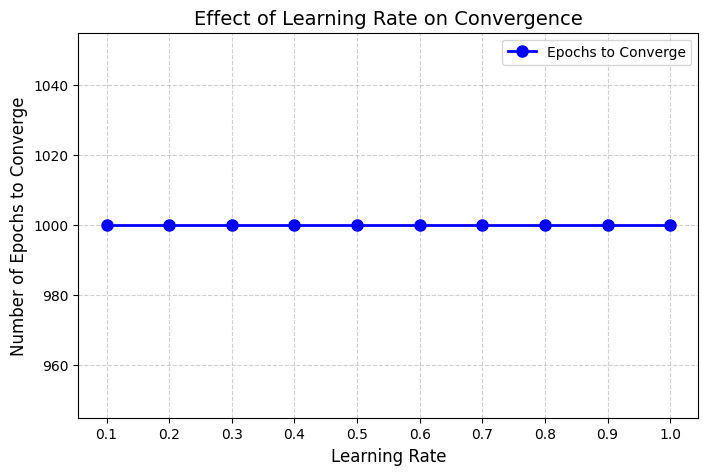

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """
    Computes the weighted sum of inputs.
    :param inputs: List or array of input values.
    :param weights: List or array of weight values.
    :return: Weighted sum of inputs.
    """
    return np.dot(inputs, weights)

def bipolar_step_activation(value):
    """
    Bipolar Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns -1.
    """
    return 1 if value >= 0 else -1

def error_comparator(expected_output, actual_output):
    """
    Computes the error between expected and actual output.
    :param expected_output: Expected output value.
    :param actual_output: Computed output value.
    :return: Error value (difference between expected and actual output).
    """
    return expected_output - actual_output

def perceptron_and_gate(training_data, initial_weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    """
    Implements a Perceptron to learn AND gate logic using a specified activation function.
    :param training_data: List of tuples (input_values, expected_output)
    :param initial_weights: Initial weights including bias.
    :param learning_rate: Learning rate for weight updates.
    :param activation_function: Activation function to use.
    :param max_epochs: Maximum number of epochs for training.
    :param convergence_threshold: Error threshold for convergence.
    """
    weights = np.array(initial_weights)  # Initialize weight array

    for epoch in range(max_epochs):
        total_error = 0  # Initialize total error for this epoch
        for inputs, expected in training_data:
            inputs_with_bias = np.insert(inputs, 0, 1)  # Adding bias term
            weighted_sum = summation_unit(inputs_with_bias, weights)  # Compute weighted sum
            output = activation_function(weighted_sum)  # Apply activation function
            error = error_comparator(expected, output)  # Compute error
            total_error += error ** 2  # Accumulate squared error
            weights += learning_rate * error * inputs_with_bias  # Update weights

        # Stop training if the total error is below the threshold
        if total_error <= convergence_threshold:
            return epoch + 1  # Return the number of epochs taken to converge

    return max_epochs  # Return max_epochs if convergence condition is not met

def plot_learning_rate_vs_epochs(learning_rates, epochs_list):
    """
    Plots the number of epochs required for convergence against different learning rates with improved visualization.
    :param learning_rates: List of different learning rates tested.
    :param epochs_list: Corresponding number of epochs taken for each learning rate.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(learning_rates, epochs_list, marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label='Epochs to Converge')
    plt.xlabel('Learning Rate', fontsize=12)
    plt.ylabel('Number of Epochs to Converge', fontsize=12)
    plt.title('Effect of Learning Rate on Convergence', fontsize=14)
    plt.xticks(learning_rates, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

# Main Program Execution
def main():
    """
    Main function to train perceptron on AND gate data using different learning rates.
    """
    training_data = [
        (np.array([0, 0]), 0),
        (np.array([0, 1]), 0),
        (np.array([1, 0]), 0),
        (np.array([1, 1]), 1)
    ]

    # Given initial weights (including bias weight W0)
    initial_weights = [10, 0.2, -0.75]

    # List of learning rates to experiment with
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    # Store the number of epochs needed for convergence for each learning rate
    epochs_list = []

    # Train perceptron with different learning rates and record epochs required for convergence
    for lr in learning_rates:
        epochs = perceptron_and_gate(training_data, initial_weights, lr, bipolar_step_activation)
        print(f"Learning Rate: {lr}, Epochs to Converge: {epochs}")
        epochs_list.append(epochs)

    # Plot learning rate vs epochs graph with improved visualization
    plot_learning_rate_vs_epochs(learning_rates, epochs_list)

# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()



Q5

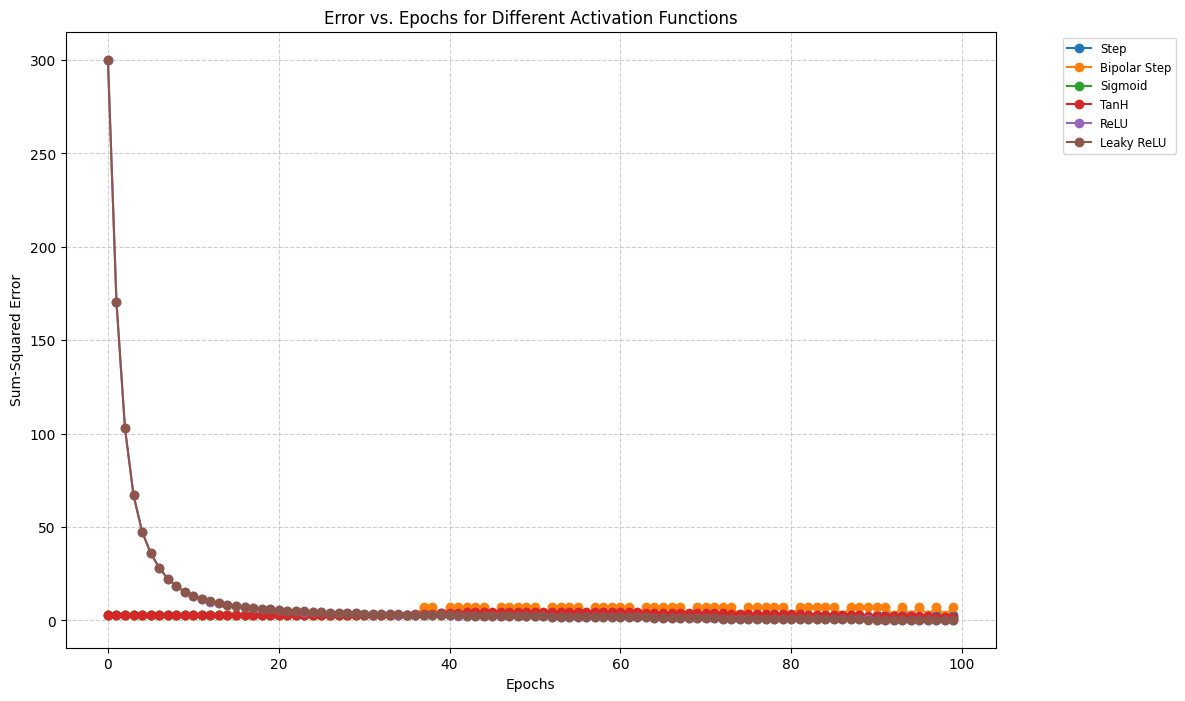

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """
    Computes the weighted sum of inputs.
    :param inputs: Array of input values.
    :param weights: Array of corresponding weights.
    :return: Weighted sum (dot product of inputs and weights).
    """
    return np.dot(inputs, weights)

def step_activation(value):
    """
    Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns 0.
    """
    return 1 if value >= 0 else 0

def bipolar_step_activation(value):
    """
    Bipolar Step Activation Function.
    Returns 1 if value is non-negative, otherwise returns -1.
    """
    return 1 if value >= 0 else -1

def sigmoid_activation(value):
    """
    Sigmoid Activation Function.
    Returns a continuous value between 0 and 1.
    """
    return 1 / (1 + np.exp(-value))

def tanh_activation(value):
    """
    Hyperbolic Tangent Activation Function.
    Returns a value between -1 and 1.
    """
    return np.tanh(value)

def relu_activation(value):
    """
    ReLU (Rectified Linear Unit) Activation Function.
    Returns the input value if positive, otherwise returns 0.
    """
    return max(0, value)

def leaky_relu_activation(value, alpha=0.01):
    """
    Leaky ReLU Activation Function.
    Returns the input value if positive, otherwise returns a small fraction of it.
    """
    return value if value > 0 else alpha * value

def error_comparator(expected_output, actual_output):
    """
    Computes the error between expected and actual output.
    :param expected_output: Desired output value.
    :param actual_output: Output from perceptron.
    :return: Error value (difference between expected and actual output).
    """
    return expected_output - actual_output

def perceptron_gate(training_data, initial_weights, learning_rate, activation_function, max_epochs=100):
    """
    Implements a Perceptron to learn logic gate behavior using a specified activation function.
    :param training_data: List of tuples containing input values and expected output.
    :param initial_weights: Initial weights including bias.
    :param learning_rate: Step size for weight updates.
    :param activation_function: Activation function to apply.
    :param max_epochs: Maximum iterations for training.
    :return: List of errors per epoch.
    """
    weights = np.array(initial_weights)
    errors_per_epoch = []

    for epoch in range(max_epochs):
        total_error = 0
        for inputs, expected in training_data:
            inputs_with_bias = np.insert(inputs, 0, 1)
            weighted_sum = summation_unit(inputs_with_bias, weights)
            output = activation_function(weighted_sum)
            error = error_comparator(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * inputs_with_bias
        errors_per_epoch.append(total_error)

    return errors_per_epoch

def plot_error_vs_epochs(errors_per_epoch, activation_name):
    """
    Plots the sum-square error against epochs for a given activation function.
    """
    plt.plot(range(len(errors_per_epoch)), errors_per_epoch, marker='o', linestyle='-', label=activation_name)

def main():
    """
    Main function to train perceptron on AND gate using different activation functions.
    """
    # Training data for AND gate (Output is 1 only when both inputs are 1)
    training_data_and = [
        (np.array([0, 0]), 0),
        (np.array([0, 1]), 0),
        (np.array([1, 0]), 0),
        (np.array([1, 1]), 1)
    ]

    # Initial weight values (including bias weight W0)
    initial_weights = [10, 0.2, -0.75]
    learning_rate = 0.05

    # Dictionary of activation functions to test
    activation_functions = {
        'Step': step_activation,
        'Bipolar Step': bipolar_step_activation,
        'Sigmoid': sigmoid_activation,
        'TanH': tanh_activation,
        'ReLU': relu_activation,
        'Leaky ReLU': leaky_relu_activation
    }

    plt.figure(figsize=(12, 8))

    # Loop through each activation function and train perceptron for AND gate
    for activation_name, activation_func in activation_functions.items():
        errors = perceptron_gate(training_data_and, initial_weights, learning_rate, activation_func)
        plot_error_vs_epochs(errors, activation_name)

    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title('Error vs. Epochs for Different Activation Functions')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.2, 1))  # Adjust legend position
    plt.show()

if __name__ == "__main__":
    main()



Q6

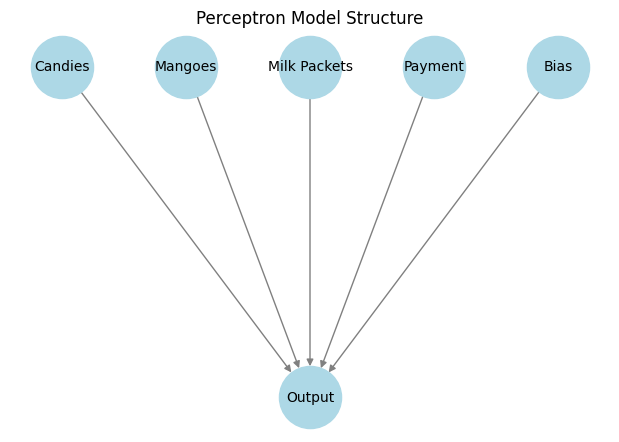

Actual vs Predicted Transactions:
Customer 1: Actual: High, Predicted: High
Customer 2: Actual: High, Predicted: High
Customer 3: Actual: High, Predicted: High
Customer 4: Actual: Low, Predicted: High
Customer 5: Actual: High, Predicted: High
Customer 6: Actual: Low, Predicted: High
Customer 7: Actual: High, Predicted: High
Customer 8: Actual: High, Predicted: High
Customer 9: Actual: Low, Predicted: High
Customer 10: Actual: Low, Predicted: High


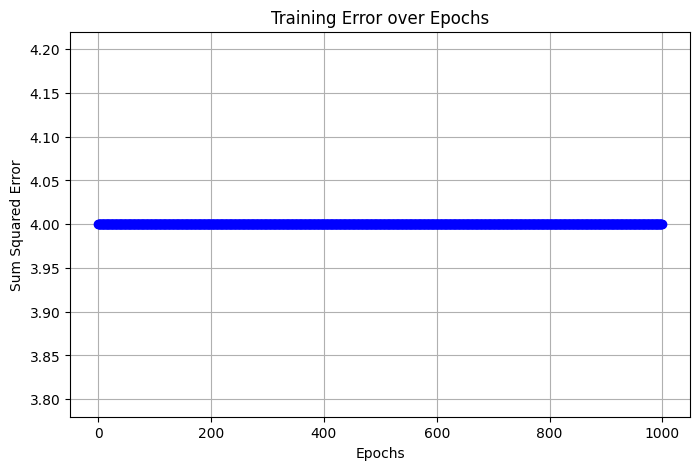

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the sigmoid function, used for weight updates."""
    return x * (1 - x)

def train_perceptron(X, y, learning_rate=0.1, epochs=1000):
    """
    Trains a perceptron using the sigmoid activation function.
    :param X: Input features (candies, mangoes, milk packets, payment)
    :param y: Target labels (1 for High Value Tx, 0 for Low Value Tx)
    :param learning_rate: Learning rate for weight updates
    :param epochs: Number of training iterations
    :return: Trained weights, bias, and error history
    """
    np.random.seed(42)  # For reproducibility
    weights = np.random.rand(X.shape[1])  # Initialize random weights
    bias = np.random.rand(1)  # Initialize bias term
    errors = []  # Store error at each epoch

    for epoch in range(epochs):
        total_error = 0  # Initialize total error for the epoch
        for i in range(X.shape[0]):
            weighted_sum = np.dot(X[i], weights) + bias  # Compute weighted sum
            output = sigmoid(weighted_sum)  # Apply activation function
            error = y[i] - output  # Compute error
            total_error += error ** 2  # Accumulate squared error

            # Update weights and bias using gradient descent
            weights += learning_rate * error * sigmoid_derivative(output) * X[i]
            bias += learning_rate * error * sigmoid_derivative(output)

        errors.append(total_error)  # Store epoch error

    return weights, bias, errors

def predict(X, weights, bias):
    """
    Make predictions using the trained perceptron.
    :param X: Input features
    :param weights: Trained weights
    :param bias: Trained bias
    :return: Predicted labels ("High" or "Low")
    """
    predictions = sigmoid(np.dot(X, weights) + bias)  # Compute activation output
    return ["High" if p >= 0.5 else "Low" for p in predictions]  # Classify transactions

def draw_perceptron():
    """
    Draws a visual representation of the perceptron model.
    """
    G = nx.DiGraph()

    # Define nodes (Inputs, Bias, and Output)
    G.add_nodes_from(["Candies", "Mangoes", "Milk Packets", "Payment", "Bias", "Output"])

    # Define edges (connections between nodes)
    edges = [("Candies", "Output"), ("Mangoes", "Output"), ("Milk Packets", "Output"), ("Payment", "Output"), ("Bias", "Output")]
    G.add_edges_from(edges)

    # Define node positions
    pos = {
        "Candies": (-1, 1), "Mangoes": (-0.5, 1), "Milk Packets": (0, 1), "Payment": (0.5, 1), "Bias": (1, 1), "Output": (0, 0)
    }

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, edge_color="gray")
    plt.title("Perceptron Model Structure")
    plt.show()

def main():
    """
    Main function to train and evaluate the perceptron model.
    """
    # Define input features (Candies, Mangoes, Milk Packets, Payment)
    X = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 1, 5, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 1, 4, 148],
        [16, 2, 4, 198]
    ])

    # Define target labels (1 for High Value Tx, 0 for Low Value Tx)
    y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

    # Draw perceptron model structure
    draw_perceptron()

    # Train perceptron
    weights, bias, errors = train_perceptron(X, y)

    # Make predictions
    predictions = predict(X, weights, bias)

    # Print actual vs predicted classifications
    print("Actual vs Predicted Transactions:")
    for i, (actual, predicted) in enumerate(zip(y, predictions)):
        actual_label = "High" if actual == 1 else "Low"
        print(f"Customer {i+1}: Actual: {actual_label}, Predicted: {predicted}")

    # Plot error over epochs
    plt.figure(figsize=(8, 5))
    plt.plot(errors, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Sum Squared Error")
    plt.title("Training Error over Epochs")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
